In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

explained variance ratio (first two components): [0.92461621 0.05301557]


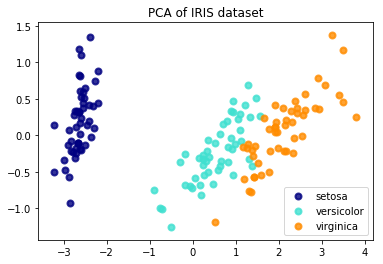

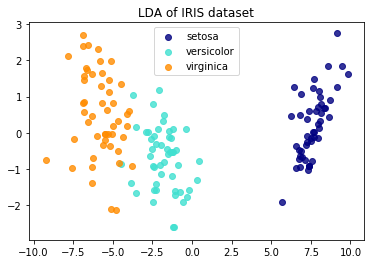

In [4]:
## iris data 불러오기
iris = datasets.load_iris()

## x,y 지정
X = iris.data
y = iris.target
target_names = iris.target_names

## pca 적용, plot을 그리기 위해서 2차원으로 축소
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

## lda 적용, plot을 그리기 위해서 2차원으로 축소
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

## Percentage of variance explained for each components
## pca적용시 첫번째, 두번째 주성분이 전체의 분산의 어느정도를 차지하는가
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

#### plot
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()
### 동일한 차원으로 축소하였을 때 lda가 pca와 비교하여 클래스간의 분리가 용이, (x축의 관점에서 봐보세요!)

In [ ]:
#### LDA로 차원축소한 변수들을 사용하고 싶을땐 다음과 같은 과정을 거치면 됩니다.
#### EX)...
# Implement LDA, LDA이용하여 피쳐 압축
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
### fit_trainsform!!
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Train Logistic Regression with LDA, 압축된 변수들을 새로운 모델(ex.logistic)에 사용
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)